# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
print("instances_annFile path:{}\n".format(instances_annFile))
coco = COCO(instances_annFile)

instances_annFile path:/opt/cocoapi/annotations/instances_val2014.json

loading annotations into memory...
Done (t=6.91s)
creating index...
index created!


**[FOOTNOTE 01:](https://docs.python.org/2/tutorial/modules.html)**
The variable `sys.path` is a list of strings that determines the **interpreter’s search path for modules**. It is initialized to a default path taken from the environment variable PYTHONPATH, or from a built-in default if PYTHONPATH is not set. You can modify it using standard list operations.

```python
>>> import sys
>>> sys.path.append('/ufs/guido/lib/python')
```

**FOOTNOTE 02:** `coco` is a data object for image instance. `coco_caps` is a data object for image captions.

In [2]:
# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=1.09s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

**FOOTNOTE 03:** The procedures to get the image file as follow.
1. Sample an `id` from `coco` as `ann_id`.
2. Retrieve `image_id` for the instance(`ann_id`).
3. Again, retrieve `img` object for the `img_id`.
4. Last, get `coco_url` for that `img` object.
5. And read in the image file directly online via the `url`.

**FOOTNOTE 04:** The procedures to get the image captions as follow.
1. Use the `img` object retrieved from **the step3 above**.
2. Retrieve `id` from `img` object as annotation id (`annIds`).
3. Load in the captions via `coco_caps.loadAnns()` method.
4. Print out the captions via `coco_caps.showAnns()` method.

http://images.cocodataset.org/val2014/COCO_val2014_000000286182.jpg


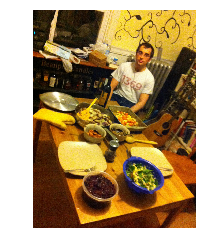

there is a man that is sitting at a table with lots of food
A man sitting in a chair across from a table topped with food.
A man sitting by a table with food in bowls and pans 
A man sitting near a table with a bunch of food on it
a man sitting in a room with a food on a table


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)